# Initialisation

* establishing the list of available machines in the environment
* Creation of profiles operating in the environment
* Import of mitre attacks applicable in the environment

In [1]:
from cyberbattle.env.samples.little_network import get_little_environment_network, get_little_environment_profiles, get_machine_list
from cyberbattle.vulnerabilities.attacks import AttackSet

num_client = 5

machines = get_machine_list(num_client)
profiles = get_little_environment_profiles(num_client)
network = get_little_environment_network(num_client)

attacks = AttackSet(machines, profiles, max_per_outcomes=1)

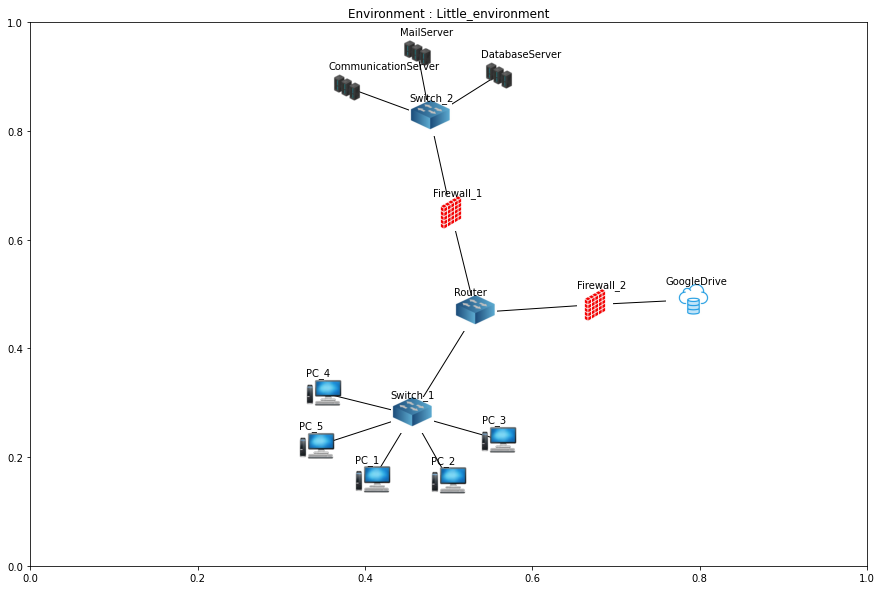

In [2]:
network.display(annotations=True)

In [3]:
network.get_services()

['HTTPS', 'sudo']

In [4]:
network.get_available_datasources()

['Logon Session',
 'Script',
 'Cloud Service',
 'User Account',
 'Process',
 'File',
 'Driver',
 'Cloud Storage']

In [5]:
network.get_machine_services('MailServer')

{'Dev': {'HTTPS': ['User Account']},
 'DSI': {'HTTPS': ['Cloud Storage', 'Cloud Service', 'User Account']}}

In [6]:
network.get_path('PC_1','GoogleDrive')

In [7]:
profiles.get_profiles()

{'Dev': 3, 'DSI': 1}

In [8]:
attacks.get_attack_count()

5

In [9]:
for machine in network.get_machine_list():

    outcomes = machine.get_outcomes()

    if outcomes:
        
        print('\n')
        print(machine.get_instance_name(),' :')
            
        for outcome in machine.get_outcomes():

            print(outcome.get_phase_name(), ' :', outcome.get())



PC_1  :
discovery  : ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']


PC_5  :
credential-access  : [('HTTPS', 'MailServer', 'DSI')]


DatabaseServer  :
collection  : Confidential document


MailServer  :
discovery  : ['DatabaseServer', 'CommunicationServer', 'GoogleDrive']


GoogleDrive  :
credential-access  : [('HTTPS', 'DatabaseServer', 'DSI')]


In [10]:
attacks.get_attacks_by_machines_string()

{'PC_2': {},
 'PC_3': {},
 'PC_4': {},
 'PC_1': {'Domain Account': {'data sources triggered': 'Process: Process Creation',
   'phase name': 'discovery',
   'Type': 'Remote'}},
 'PC_5': {'Modify Authentication Process': {'data sources triggered': 'File: File Creation',
   'phase name': 'credential-access',
   'Type': 'Remote'}},
 'Switch_1': {},
 'Switch_2': {},
 'Router': {},
 'DatabaseServer': {'Input Capture': {'data sources triggered': 'Process: Process Metadata',
   'phase name': 'collection',
   'Type': 'Local'}},
 'MailServer': {'Software Discovery': {'data sources triggered': 'Process: OS API Execution',
   'phase name': 'discovery',
   'Type': 'Local'}},
 'CommunicationServer': {},
 'GoogleDrive': {'Steal Application Access Token': {'data sources triggered': 'User Account: User Account Modification',
   'phase name': 'credential-access',
   'Type': 'Remote'}},
 'Firewall_1': {},
 'Firewall_2': {}}

# Run environment steps

In [11]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.env.utils.user import DSI, Dev

profiles = {
    DSI(): 1,
    Dev(): num_client - 2
}

env = CyberBattleEnv(network, profiles)

env.reset()

for _ in range(5):
    matrix = env.step(display_Siem=True)

env.reset()




Traffic during step 0


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,yes,GoogleDrive,PC_4,Process: Process Modification,sudo,no
1,yes,PC_3,GoogleDrive,User Account: User Account Modification,HTTPS,no
2,yes,PC_5,PC_5,File: File Metadata,sudo,no
3,no,_,_,_,_,_
4,no,_,_,_,_,_




Traffic during step 1


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,no,_,_,_,_,_
1,no,_,_,_,_,_
2,no,_,_,_,_,_
3,no,_,_,_,_,_
4,yes,PC_4,GoogleDrive,User Account: User Account Metadata,HTTPS,no




Traffic during step 2


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,yes,PC_3,MailServer,User Account: User Account Deletion,HTTPS,no
1,yes,PC_5,GoogleDrive,Driver: Driver Load,HTTPS,no
2,no,_,_,_,_,_
3,yes,PC_4,GoogleDrive,Driver: Driver Load,HTTPS,no
4,yes,GoogleDrive,PC_2,User Account: User Account Metadata,sudo,no




Traffic during step 3


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,yes,PC_5,GoogleDrive,User Account: User Account Creation,HTTPS,no
1,yes,PC_4,PC_2,File: File Accesss,sudo,no
2,yes,PC_3,PC_2,Script: Script Execution,sudo,no
3,no,_,_,_,_,_
4,no,_,_,_,_,_




Traffic during step 4


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,no,_,_,_,_,_
1,yes,PC_2,GoogleDrive,Cloud Storage: Cloud Storage Access,HTTPS,no
2,yes,PC_3,GoogleDrive,Driver: Driver Metadata,HTTPS,no
3,yes,PC_5,PC_5,Process: Process Access,sudo,no
4,yes,PC_4,GoogleDrive,Driver: Driver Metadata,HTTPS,no


In [12]:
for _ in range(10000):
    matrix = env.step()

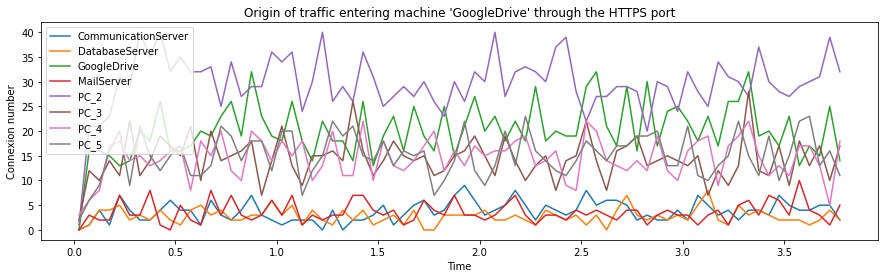

In [13]:
env.display_history('GoogleDrive', 'HTTPS')